In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 10
TRIAL_ID = 0

Cel znajduje się w dużej odległości, tuż przed nim znajduje się poruszająca się ruchem jednostajnym przeszkoda ze szczeliną.

In [2]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.7] * 100
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 6

rectangles = [
    ((-500, 22), (8, 25)), ((9, 22), (500, 25)),
]
rectangle_vs = [(-2, -0.5)] * 2
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)

targets = [(0, 30)] * T
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 1000
alpha_inf = 0.7
n_immigrants = 100
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = np.geomspace(0.01, 0.1, d)
num_iterations_init = 900
num_iterations = 300

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=50)
TRIAL_ID = 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0


/home/i291318/Dynamic-inverse-kinematics/simulation.py:34: RuntimeWarning: divide by zero encountered in true_divide
  t = _vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:35: RuntimeWarning: divide by zero encountered in true_divide
  u = _vector_product(x2 - x1, d1) / rs


Iteration 0, #feasible: 1000, best: [239.49739041], #infeasible: 0, best: -
Iteration 50, #feasible: 300, best: [64.45535306], #infeasible: 700, best: [1.80652277 1.        ]
Iteration 100, #feasible: 300, best: [15.22059985], #infeasible: 700, best: [7.87669087e-04 1.00000000e+00]
Iteration 150, #feasible: 300, best: [2.47256716], #infeasible: 700, best: [4.48411577e-06 1.00000000e+00]
Iteration 200, #feasible: 300, best: [0.01070068], #infeasible: 700, best: [4.48411577e-06 1.00000000e+00]
Iteration 250, #feasible: 300, best: [0.00307421], #infeasible: 700, best: [4.48411577e-06 1.00000000e+00]
Iteration 300, #feasible: 300, best: [0.00094318], #infeasible: 700, best: [4.48411577e-06 1.00000000e+00]
Iteration 350, #feasible: 300, best: [6.00698118e-06], #infeasible: 700, best: [4.48411577e-06 1.00000000e+00]
Iteration 400, #feasible: 300, best: [6.00698118e-06], #infeasible: 700, best: [4.48411577e-06 1.00000000e+00]
Iteration 450, #feasible: 300, best: [6.00698118e-06], #infeasible:

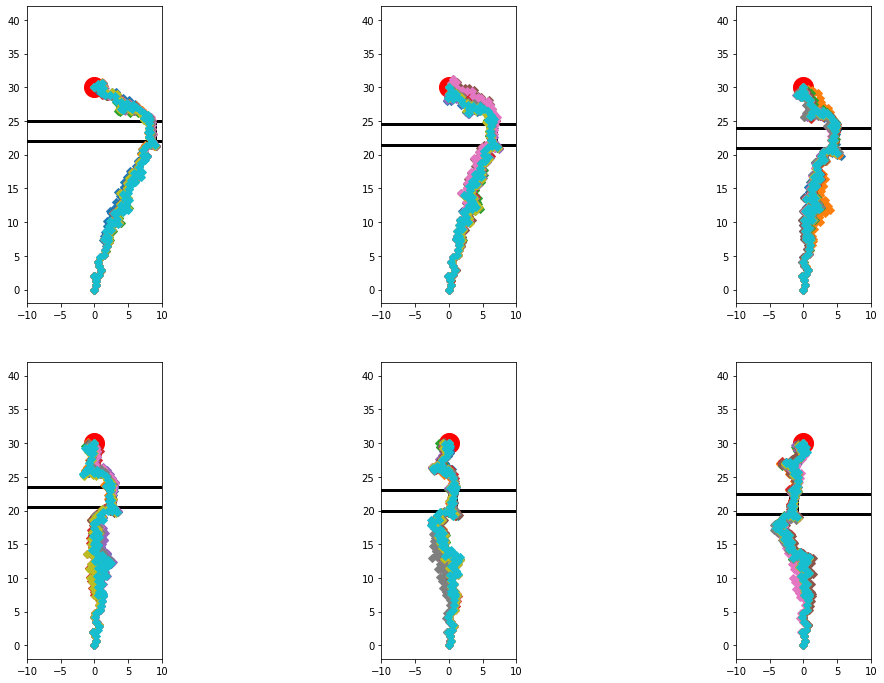

In [3]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=3, figsize=(18, 12), xlim=(-10, 10), ylim=(-2, 42), squeeze=False)

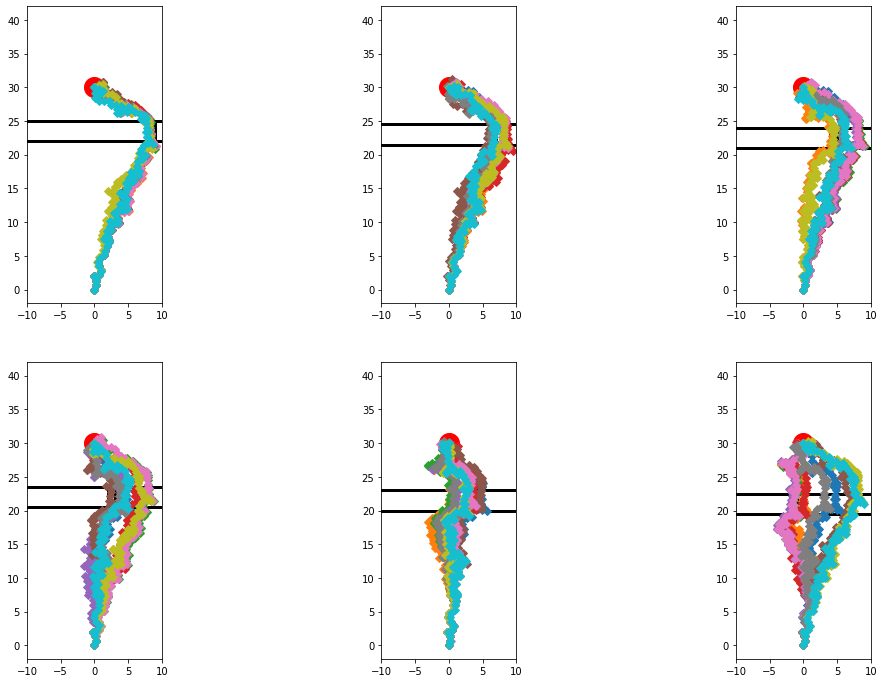

In [4]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=3, figsize=(18, 12), xlim=(-10, 10), ylim=(-2, 42), squeeze=False)